__Introduction__
<br><br>
From Wikipedia: an autoencoder is a type of (feedforward) artificial neural network used to learn efficient codings of unlabeled data.
<br><br>
An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation.
<br><br>
The autoencoder can be expressed as

> `L(x,g(f(x)))`,

for some input space `x` and non-linear encoder and decoder functions `f`, `g`. Note the lower-dimensional latent space is often denoted `f(x) = h`.

In [1]:
# Import ML-related libraries
import tensorflow as tf
from tensorflow import keras

# Import data-related libraries
import matplotlib.pyplot as plt

2023-10-20 22:47:09.406501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


__1. Process the Data__
<br><br>
Retrieve the data (i.e. a bunch of images of handwritten numbers), and ensure all values are between -1 and 1.

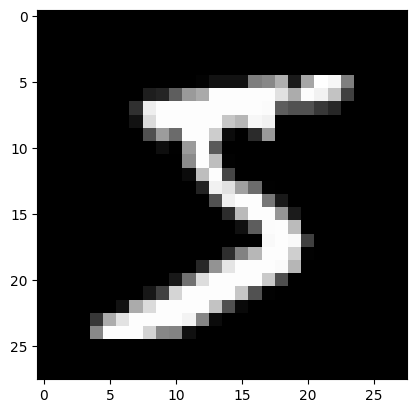

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

plt.imshow(x_train[0], cmap="gray" )

__2. Construct the Autoencoder__
<br><br>
Instantiate a `Model` class from `keras` using the functional API. The idea is to start with an input, and successively build 'dense' layers (i.e. layers with neurons).
<br><br>
Note the comments.

In [3]:
# Format the input
input_layer = keras.Input(shape=(28,28,1), name="raw_input")
encoder_input = keras.layers.Flatten(name="encoder_in")(input_layer)

# Compress the input space into a lower-dimensional latent space... this becomes input for the decoder
# --> `f(x) = h`
encoder_output = keras.layers.Dense(64, activation="relu", name="encoder_out")(encoder_input)

# Attempt to reconstruct the original image from the encoded information in the latent space `h`
# --> `g(h) = x`
decoder_output = keras.layers.Dense(784, activation="relu", name="decoder_out")(encoder_output)

# Re-format the output
output_layer = keras.layers.Reshape((28,28,1), name="raw_output")(decoder_output)

In [4]:
# Save the encoder; the latent lower-dimensional space `h` is valuable
encoder = keras.Model(input_layer, encoder_output)

autoencoder = keras.Model(input_layer, output_layer, name="autoencoder")
autoencoder.summary() 

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 raw_input (InputLayer)      [(None, 28, 28, 1)]       0         
                                                                 
 encoder_in (Flatten)        (None, 784)               0         
                                                                 
 encoder_out (Dense)         (None, 64)                50240     
                                                                 
 decoder_out (Dense)         (None, 784)               50960     
                                                                 
 raw_output (Reshape)        (None, 28, 28, 1)         0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


__3. Train the Model__
<br><br>
Autoencoders fit within an unsupervised paradigm, i.e. they do not require labelled data. But it is a feedforward network, implementing some sort of backpropagation.
<br><br>
To resolve this, we train the autoencoder based on its reconstruction error; how far is the output from the input? Indeed, this explains why the input and output of the model are of the exact same architecture.

In [5]:
opt = keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(opt, loss="mse")
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1) 

Epoch 1/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0179 - val_loss: 0.0118
Epoch 2/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 3/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0107 - val_loss: 0.0107


__4. Observe the Results__
<br><br>
Note. The `predict` method takes in a list of predictions.

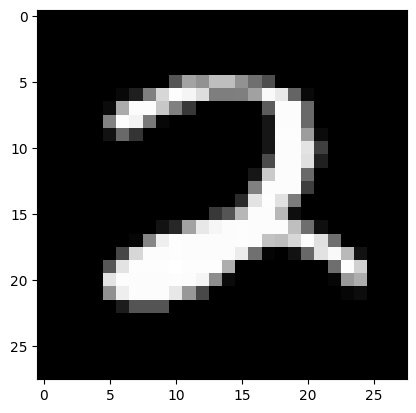

In [6]:
choose_sample = 888
plt.imshow(x_test[choose_sample], cmap="gray" )

1/1 [==============================] - 0s 78ms/step


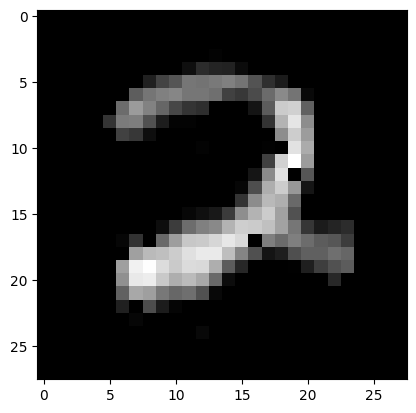

In [7]:
sample = autoencoder.predict([x_test[choose_sample].reshape(-1,28,28,1)])[0]
plt.imshow(sample, cmap="gray")

1/1 [==============================] - 0s 53ms/step


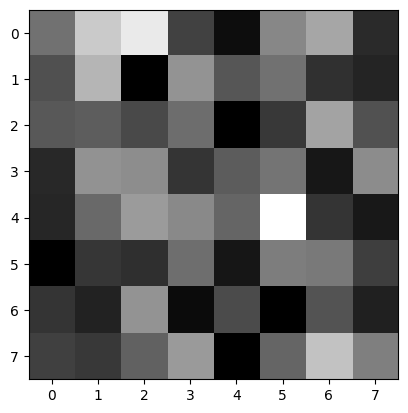

In [8]:
sample_latent = encoder.predict([x_test[choose_sample].reshape(-1,28,28)])[0] 
plt.imshow(sample_latent.reshape((8,8)), cmap="gray")